# Exploring the misclassified runs
Things I've noticed. Many of the misclassified systems are:
* 2nd + 3rd planet close to 4:3 resonance
* When comparing the misclassified runs to unstable systems, they seem to consistently be outliers:
    * I.e. min/maxdaOverRH
    * norm_a3_slope vs. norm_a2_slope

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
plotly.offline.init_notebook_mode()

In [3]:
dftest = pd.read_csv('../data/1e7data_holdout.csv', index_col=0)
dftest.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,1.000000e+07,10000000.0,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,0.000175,0.007353,0.000124,0.016611,0.002061,0.000299,0.000081,0.000301,0.001068,0.001251
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.000101,0.004332,0.000179,0.015675,0.000293,0.000242,0.000046,0.000635,0.000009,0.000270
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.000188,0.041751,0.000054,0.036828,0.000012,0.006989,0.000762,0.002772,0.000394,0.001563
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.000703,0.091574,0.000048,0.015606,0.000246,0.004709,0.000930,0.008343,0.000694,0.000366
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.000277,0.065076,0.000003,0.018345,0.000280,0.000247,0.000108,0.009791,0.001519,0.002027


In [14]:
cols = dftest.columns
for i in range(len(cols)):
    print cols[i]

Stable
Norbits_instability
Norbits
Mplanet
RH/a
a1
P1
e1
pomega1
inc1
Omega1
f1
x1
y1
z1
vx1
vy1
vz1
a2
P2
e2
pomega2
inc2
Omega2
f2
x2
y2
z2
vx2
vy2
vz2
a3
P3
e3
pomega3
inc3
Omega3
f3
x3
y3
z3
vx3
vy3
vz3
Rel_Eerr
integ_time
avg_a1
std_a1
max_a1
min_a1
norm_std_a1
norm_max_a1
norm_std_window10_a1
norm_max_window10_a1
avg_a2
std_a2
max_a2
min_a2
norm_std_a2
norm_max_a2
norm_std_window10_a2
norm_max_window10_a2
avg_a3
std_a3
max_a3
min_a3
norm_std_a3
norm_max_a3
norm_std_window10_a3
norm_max_window10_a3
avg_e1
std_e1
max_e1
min_e1
norm_std_e1
norm_max_e1
norm_std_window10_e1
norm_max_window10_e1
avg_e2
std_e2
max_e2
min_e2
norm_std_e2
norm_max_e2
norm_std_window10_e2
norm_max_window10_e2
avg_e3
std_e3
max_e3
min_e3
norm_std_e3
norm_max_e3
norm_std_window10_e3
norm_max_window10_e3
daOvera1
daOvera2
daOverRH1
daOverRH2
mindaOvera
maxdaOvera
mindaOverRH
maxdaOverRH
norm_std_inc1
norm_max_inc1
norm_std_window10_inc1
norm_max_window10_inc1
norm_std_inc2
norm_max_inc2
norm_std_window10_inc2


In [59]:
#features
dftest["P3/P2"] = dftest["P3"]/dftest["P2"]
dftest["P2/P1"] = dftest["P2"]/dftest["P1"]
dftest["P3/P1"] = dftest["P3"]/dftest["P1"]

#stable/unstable systems
missclass = [4002,4404,2487,1042,313,3778,804,2965,2575,461,346,2949,822,2035,2750,2401]
#stable1 = dftest[dftest["Stable"]==True]
stable1 = dftest[dftest["Stable"]==False]
unstable1 = dftest.loc[missclass]

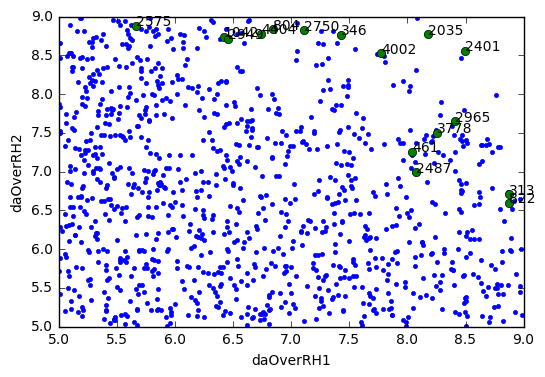

In [94]:
#f=["norm_a1_slope","norm_a2_slope"]
#plt.plot(stable1[f[0]].loc[(stable1[f[0]] >0)&(stable1[f[1]] >-1e-8)], stable1[f[1]].loc[(stable1[f[0]] >0)&(stable1[f[1]] >-1e-8)],'.')
#f=["norm_a3_slope","norm_a2_slope"]
#plt.plot(stable1[f[0]].loc[(abs(stable1[f[0]])<1e-8)&(abs(stable1[f[1]])<1e-8)], stable1[f[1]].loc[(abs(stable1[f[0]])<1e-8)&(abs(stable1[f[1]])<1e-8)],'.')

f=["daOverRH1","daOverRH2"]
plt.plot(stable1[f[0]], stable1[f[1]],'.')
plt.xlabel(f[0])
plt.ylabel(f[1])
plt.plot(unstable1[f[0]], unstable1[f[1]],'o')
xy = zip(unstable1[f[0]], unstable1[f[1]])
for i in range(len(missclass)):
    plt.annotate('%d' % missclass[i], xy=xy[i], textcoords='data')
#plt.xscale('log')
#plt.yscale('log')

In [74]:
cols = ["norm_a1_slope","norm_a2_slope","norm_a3_slope"]

trace0 = go.Scatter3d(
    x=stable1[cols[0]],
    y=stable1[cols[1]],
    z=stable1[cols[2]],
    mode='markers',
    name='stable',
    marker=dict(
        size=4,
        #color=y,             # set color to an array/list of desired values
        #colorscale='RdGy',   # choose a colorscale
        opacity=0.8
    )
)

trace1 = go.Scatter3d(
    x=unstable1[cols[0]],
    y=unstable1[cols[1]],
    z=unstable1[cols[2]],
    mode='markers',
    name='unstable',
    marker=dict(
        size=4,
        #color=y,             # set color to an array/list of desired values
        #colorscale='RdGy',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace0,trace1]
layout = go.Layout(
    scene=Scene(
        xaxis=XAxis(title=cols[0]),
        yaxis=YAxis(title=cols[1]),
        zaxis=ZAxis(title=cols[2])
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [6]:
#Period ratios
df["P3/P2"] = df["P3"]/df["P2"]
df["P3/P1"] = df["P3"]/df["P1"]
df["P2/P1"] = df["P2"]/df["P1"]

#resonances - first order are (p+1):p, second order are (p+2):p
df["r21"] = 0
df["r32"] = 0
df["r31"] = 0
res = [6./5.,5./4.,4./3.,7./5.,1.5,5./3.,2]  #max P3/P1 = 1.7 < 2
proximity = 0.01   #proximity to resonance
for r in res:
    df.loc[abs(df["P3/P2"] - r)<=proximity,"r32"] = 1
    df.loc[abs(df["P3/P1"] - r)<=proximity,"r31"] = 1
    df.loc[abs(df["P2/P1"] - r)<=proximity,"r21"] = 1

#hill sum
df["RH1"] = 0.5*(df['a1']+df['a2'])*(2*df["Mplanet"]/3.)**(1./3.)
df["RH2"] = 0.5*(df['a2']+df['a3'])*(2*df["Mplanet"]/3.)**(1./3.)
df["Hillsum"] =  (df['a2']-df['a1'])/df["RH1"] + (df['a3']-df['a2'])/df["RH2"]